# Lab - Dane 2
## Wartości odstające
Odstające wartości często można zauważyć na histogramie.

In [32]:

import pandas as pd
import numpy as np

df = pd.read_csv("data/diamonds.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


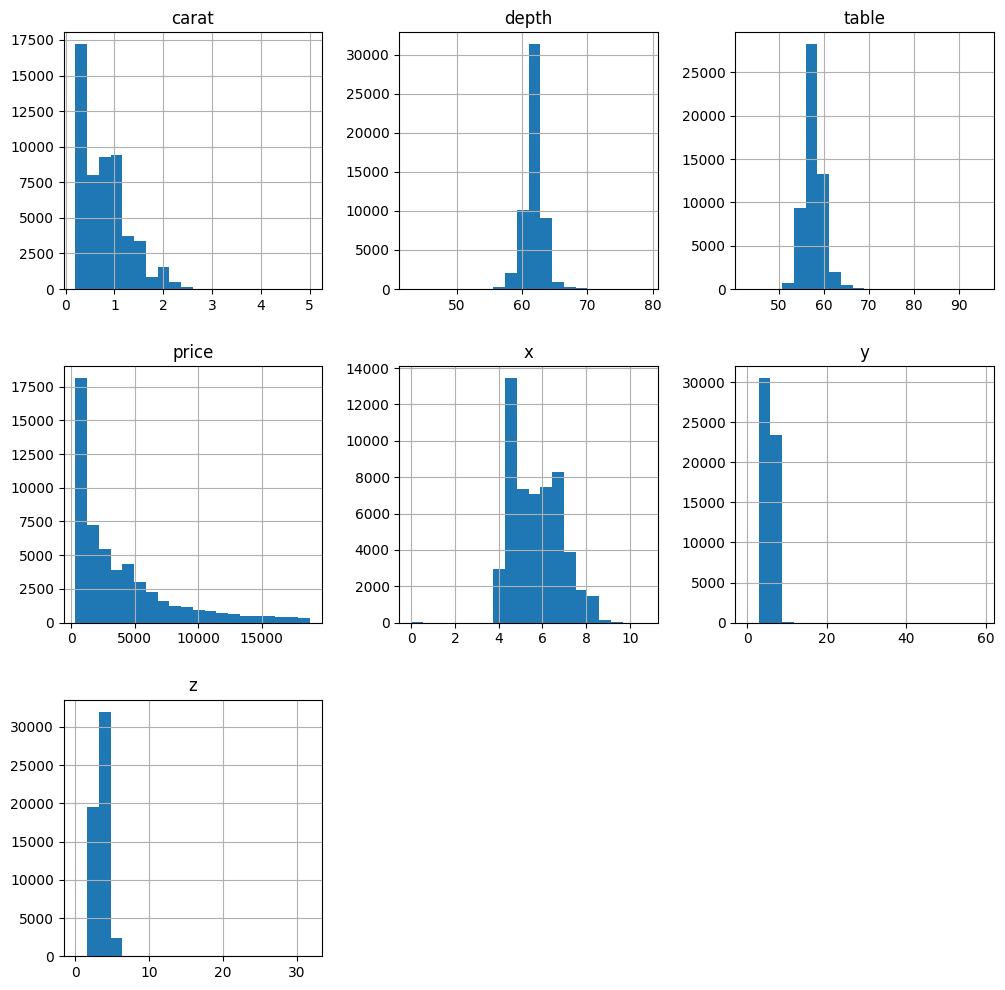

In [19]:
df.hist(figsize=(12, 12), bins=20);

Uwagę zwracają w szczególności zmienne `y` i `z`. 

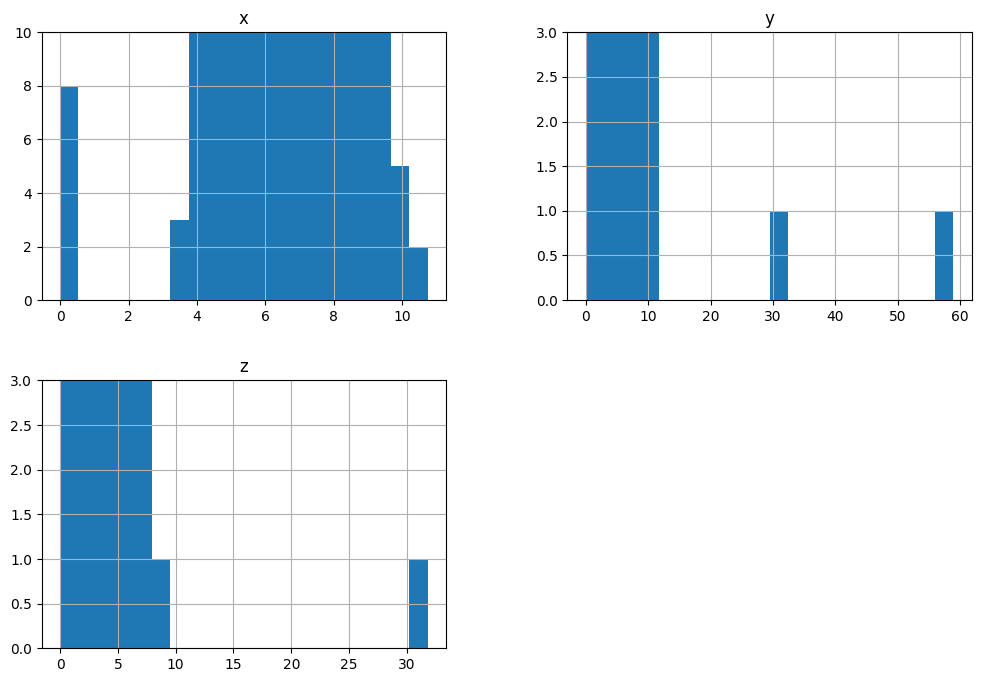

In [20]:
((axx, axy), (axz, _)) = df[["x", "y", "z"]].hist(figsize=(12, 8), bins=20)
axx.set_ylim(0, 10)
axy.set_ylim(0, 3)
axz.set_ylim(0, 3);

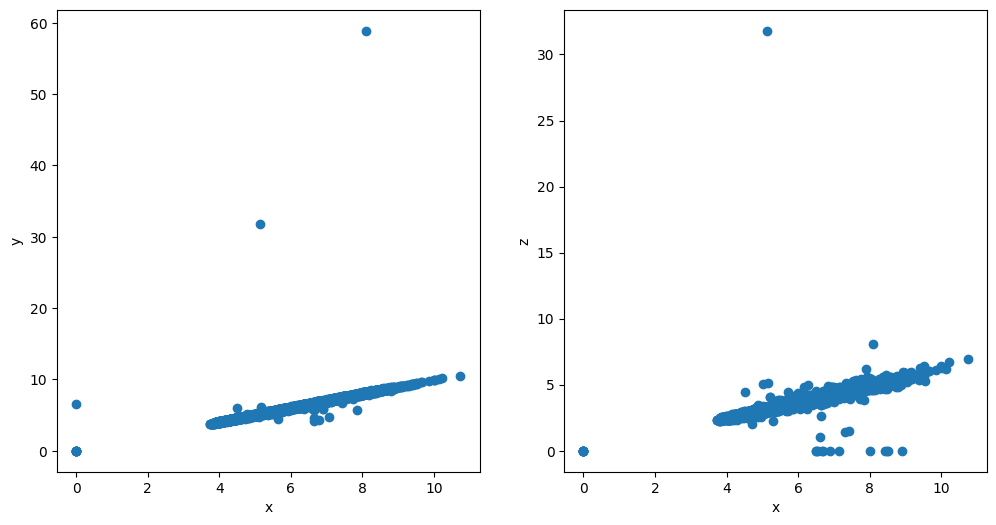

In [21]:

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter("x", "y", data=df)
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2.scatter("x", "z", data=df)
ax2.set_xlabel("x")
ax2.set_ylabel("z");

Wartości odstające można także wykryć licząc $Z$-score: $$Z = \frac{x - \mu}{\sigma}.$$

Za odstające uznaje się zwykle wartości z $|Z|>3$.

In [22]:
y_zscore = (df.y - df.y.mean())/df.y.std()
y_zscore.abs().sort_values().tail(10)

27415     4.207450
15951     5.020884
49557     5.020884
24520     5.020884
27429     5.020884
26243     5.020884
11963     5.020884
49556     5.020884
49189    22.821717
24067    46.549216
Name: y, dtype: float64

In [23]:
z_zscore = (df.z - df.z.mean())/df.z.std()
z_zscore.abs().sort_values().tail(10)

11963     5.014510
11182     5.014510
4791      5.014510
10167     5.014510
24520     5.014510
51506     5.014510
27429     5.014510
49557     5.014510
24067     6.406793
48410    40.047205
Name: z, dtype: float64

Wartości znajdujące się 22, 40 i 46 odchyleń standardowych od średniej to prawdopodobnie błędy w danych, które można oznaczyć jako `NA`.

In [24]:
df.loc[df.y > 20, "y"] = np.nan
df.loc[df.z > 20, "z"] = np.nan

Za błędne można uznać także wartości 0 w wymiarach `x`, `y` i `z`

In [25]:
df2 = df.replace({"x": 0., "y": 0., "z": 0.}, np.nan)

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

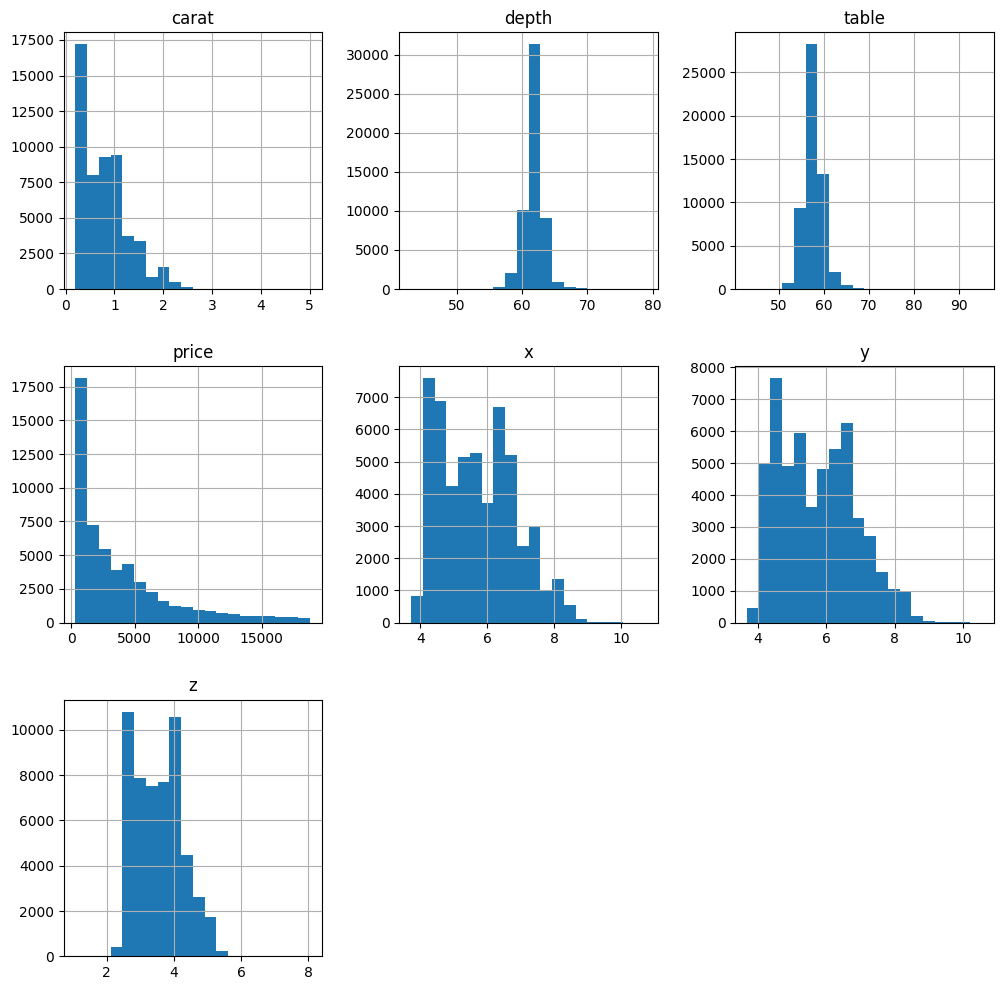

In [26]:
df2.hist(figsize=(12, 12), bins=20)

## Wartości brakujące
Brakujące wartości w pandas zapisywane są jako `pd.NA` lub `np.nan`.
 - Wykrywanie brakujących:`df.info()`, `df.isna()`.
 - Usuwanie (wiersze lub kolumny): `df.dropna(axis=0)`, `df.dropna(axis=1)`.
 - Zastępowanie podaną wartością: `df.fillna()`.
### Przykłady

In [33]:
import pandas as pd
housing = pd.read_csv("data/housing.csv")
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [28]:
housing_na_rows = housing.isna().any(axis=1)
housing[housing_na_rows]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [29]:
housing1 = housing.dropna(axis=0)
housing1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [30]:
housing2 = housing.dropna(axis=1)
housing2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   population          20640 non-null  float64
 5   households          20640 non-null  float64
 6   median_income       20640 non-null  float64
 7   median_house_value  20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


In [31]:
housing3 = housing.fillna({"total_bedrooms": housing["total_bedrooms"].mean()})
housing3[housing_na_rows].head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,537.870553,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,537.870553,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,537.870553,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,537.870553,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,537.870553,387.0,161.0,3.9063,178400.0,NEAR BAY
738,-122.14,37.67,37.0,3342.0,537.870553,1635.0,557.0,4.7933,186900.0,NEAR BAY
1097,-121.77,39.66,20.0,3759.0,537.870553,1705.0,600.0,4.7120,158600.0,INLAND
1350,-121.95,38.03,5.0,5526.0,537.870553,3207.0,1012.0,4.0767,143100.0,INLAND
1456,-121.98,37.96,22.0,2987.0,537.870553,1420.0,540.0,3.6500,204100.0,INLAND
1493,-122.01,37.94,23.0,3741.0,537.870553,1339.0,499.0,6.7061,322300.0,NEAR BAY


## Zadania
1. Sprawdź, czy pozostałe kolumny zbioru `diamonds` mają wartości odstające. 
2. Usuń obserwacje zawierające wartości odstające ze zbioru w pilku `glass.csv`. 
    * Opcja 1: usuń wszystkie obserwacje zawierające wartości z $|Z| > 3$. Wskazówka: aby obliczyć $Z$-score dla wielu kolumn numerycznych jednocześnie można zastsować metodę `apply`.
    * Opcja 2: usuń wszystkie obserwacje, w których co najmniej dwie wartości są poza zakresem $[Q_1 - 1.5(Q_3 - Q_1), Q_3 + 1.5(Q_3 - Q_1)]$

3. Zbiór danych w pliku `censusData-with3errors` zawiera trzy celowo dodane błędy. Znajdź je i zastąp wartością `pd.NA`. 
4. Zbiór danych w z Zadania 3. zawiera także brakujące wartości. 
    - Brakujące wartości oznaczone są w pliku jako `?`. Sprawdź w dokumentacji `read_csv()`, jaki parametr należy ustawić, aby wczytać je jako wartości `NA`. Uwaga: aby poprawnie wczytać plik należy podać parametr (`skipinitialspace=True`).
    - Znajdż wiersze z największą liczbą brakujących wartości i usuń je. Wskazówka: brakujące wartości w wierszach można zliczyć `df.isna().sum(axis=1)`. Przyda się też metoda `value_counts()`.
    - Sprawdź, które kolumny zawierają mniej niż 3% brakujących wartości. W tych kolumnach zastąp brakujące wartości najczęściej występującą wartością. Korzystaj z metod `fillna()`, `mode()`. Wskazówka: użyj `mode()[0]` aby otrzymać pojedynczą wartość.
    - Usuń pozostałe kolumny zawierające brakujące wartości.
5. Wczytaj dowolny zbiór danych z [repozytorium UCI](https://archive.ics.uci.edu/), a następnie:
    - Wizualizuj rozkłady zmiennych. Można zastosować np. histogramy, wykresy słupkowe, wykresy punktowe, pairplot, mapy korelacji, etc.
    - Sprawdź, czy w zbiorze znajdują się wartości brakujące lub odstające. Jeśli zbiór zawiera ewidentne błędy, oznacz je jako `NA`/`NaN`.